## Lending Club Case Study

### Objective:
EDA on loan dataset to analyse factors predominant in defaulting loan repayment

#### Problem Statement:

A consumer finance company that lends different loans to urban customers wants to be able to assess the risks related to granting loan to a customer.

Based on `risk assessment` company should be able to identify and `accept` or `reject` loan application.
1. How likely a person is to default a loan and is a bad candidate to grant loan
2. If a person is high risk then should the interest rate be increased
3. Is the customer a good candidate to lend

#### GOAL

**Reduce `credit loss` for the company by evaluating the `driving factors/ variables` for defaulting loan repayment**

---
#### Steps

1. Understand Data
2. Data cleaning - remove outliers, null values, fix data types
3. Data Analysis - Univariate, Bivariate, Multivariate
4. Visualise results
5. Conclusion

---

##### Import Libraries

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
# Charts and plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Warnings library
import warnings #warning
warnings.filterwarnings('ignore')


#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [2]:
# Load Data
loan = pd.read_csv('loan.csv')
data_dict = pd.read_excel('Data_Dictionary.xlsx')

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
# Shape of dataset
loan.shape

(39717, 111)

In [4]:
# Data types of all columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### Cleanup Data

Clean null values, unused columns

In [5]:
# Check null values
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [6]:
# Remove columns with all null values

loan = loan.loc[:, ~loan.isnull().all()]
print(loan.shape)

print(loan.isnull().sum().sort_values(ascending=False))

(39717, 57)
next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv 

In [7]:
# Remove columns with more than 60% null values

loan = loan.loc[:, ~((loan.isnull().sum()/loan.shape[0])*100 > 60.0)]
print(loan.shape)

print(loan.isnull().sum().sort_values(ascending=False))

(39717, 54)
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
total_rec_prncp                   0
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_acc                         0
total_pymnt                       0
total_pymnt_inv                   0
collection_recovery_fee           0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
pub_rec                           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq                    0
delinq_amnt     

In [8]:
# Shape after cleaning null values
loan.shape

(39717, 54)

In [9]:
## Remove non unique columns that only have 1 unique value
loan = loan.loc[:, ~(loan.nunique() == 1)]

loan.shape

(39717, 45)

In [10]:
loan.nunique().sort_values(ascending=True)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [11]:
## Remove columns
# id: redundant column to member_id
# url, desc, earliest_cr_line, revol_bal, title, emp_title, collection_recovery_fee: not required for credit loss analysis
# zip_code: masked therefore cannot be of help in analysis

loan = loan.drop(['id', 'url', 'desc', 'earliest_cr_line', 'revol_bal', 'title', 'emp_title', 'zip_code', 'collection_recovery_fee', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)
loan.shape

(39717, 34)

In [12]:
## Removing extra strings and convert to appropriate datatypes

loan['term'] = loan['term'].apply(lambda x: int(x.replace(' months', '')))
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '')))
loan['revol_util'] = loan['revol_util'].apply(lambda x: float(str(x).replace('%', '')))

# Assuming '< 1 year' as 0.7 and converting to float values
loan['emp_length'] = loan['emp_length'].str.replace('< 1', '0.7').replace('[$a-zA-Z+]', '', regex=True).astype('float')

# Change column type to category
for col in ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']:
    loan[col] = loan[col].astype('category')

# Change column type to datetime
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_d_month'] = pd.to_datetime(loan['issue_d'],format='%b-%y').dt.month
loan['issue_d_year'] = pd.to_datetime(loan['issue_d'],format='%b-%y').dt.year

loan.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_length                     float64
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                   category
purpose                       category
addr_state                    category
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_util                     float64
total_acc                        int64
out_prncp                      float64
out_prncp_inv            

In [13]:
# Round all float types to 2 decimals

for cols in loan.columns:
    if(loan[cols].dtype == 'float64'):
        loan[cols] = loan[cols].round(2)

In [30]:
loan.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_month,issue_d_year,int_rate_groups,open_acc_groups,total_acc_groups,annual_inc_groups
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,3,0,83.7,9,0.0,0.0,5863.16,5833.84,5000.00,863.16,0.00,0.00,171.62,0.0,12,2011,9%-13%,2-10,2-20,3k-31k
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0.7,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,3,0,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,119.66,0.0,12,2011,13%-17%,2-10,2-20,3k-31k
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,2,0,98.5,10,0.0,0.0,3005.67,3005.67,2400.00,605.67,0.00,0.00,649.91,0.0,12,2011,13%-17%,2-10,2-20,3k-31k
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,10,0,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,357.48,0.0,12,2011,13%-17%,2-10,20-37,31k-58k
5,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,3,9,0,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,161.03,0.0,12,2011,5%-9%,2-10,2-20,31k-58k
6,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,1,7,0,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,1313.76,0.0,12,2011,13%-17%,2-10,2-20,31k-58k
7,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,9.0,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,CA,5.35,0,2,4,0,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,111.34,0.0,12,2011,17%-21%,2-10,2-20,31k-58k
8,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,4.0,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,CA,5.55,0,2,11,0,32.6,13,0.0,0.0,646.02,646.02,162.02,294.94,0.00,189.06,152.39,0.0,12,2011,21%-24%,10-19,2-20,31k-58k
9,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,0.7,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,0,0,2,0,36.5,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.00,269.29,121.45,0.0,12,2011,9%-13%,2-10,2-20,3k-31k
10,1305201,6500,6500,6500.0,60,14.65,153.45,C,C3,5.0,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,AZ,16.12,0,2,14,0,20.6,23,0.0,0.0,7678.02,7678.02,6500.00,1178.02,0.00,0.00,1655.54,0.0,12,2011,13%-17%,10-19,20-37,58k-85k


---
### Finding and cleaning **Outliers**



Loan Amount Quantiles
0.50    10000.0
0.75    15000.0
0.90    22000.0
0.95    25000.0
0.97    30000.0
0.98    31468.0
0.99    35000.0
Name: loan_amnt, dtype: float64


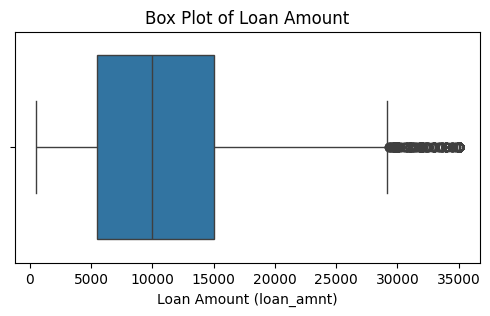


Interest Rate Quantiles
0.50    11.86
0.75    14.59
0.90    16.89
0.95    18.54
0.97    19.42
0.98    20.25
0.99    20.99
Name: int_rate, dtype: float64


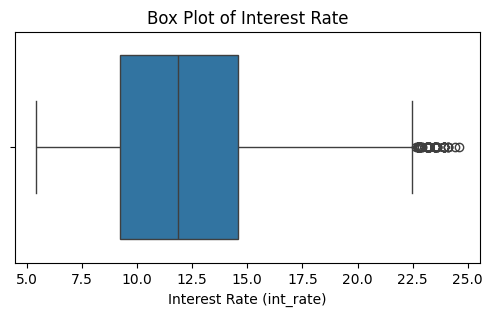


Annual Income Quantiles
0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64


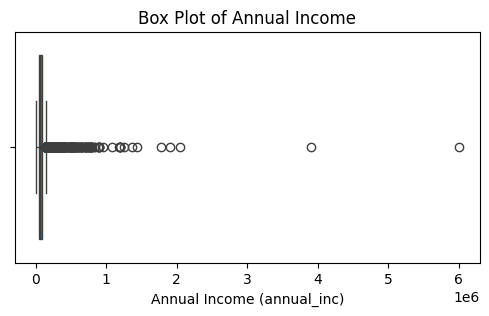


Debt to Income Ratio Quantiles
0.50    13.40
0.75    18.60
0.90    22.33
0.95    23.84
0.97    24.54
0.98    24.88
0.99    26.68
Name: dti, dtype: float64


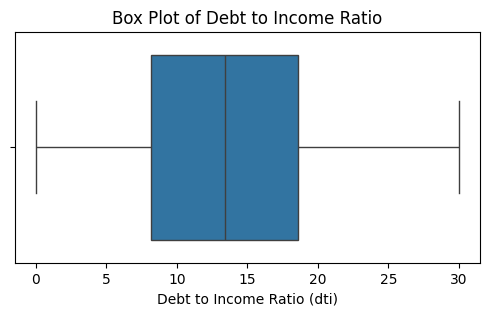

In [15]:
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
numerical_col_desc = {
    'loan_amnt': 'Loan Amount',
    'int_rate': 'Interest Rate',
    'annual_inc': 'Annual Income',
    'dti': 'Debt to Income Ratio'
}
for col in numerical_cols:
    quantile = loan[col].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
    print('\n' + numerical_col_desc[col] + ' Quantiles')
    print(quantile)
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=loan[col]).set(
        xlabel=numerical_col_desc[col] + ' (' +col+ ')'
    )
    plt.title(f'Box Plot of {numerical_col_desc[col]}')
    plt.show()

In [16]:
## Removing Outliers
# Annual Income starts increasing exponentially from 95 Percentile onwards, so they need to be removed
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan['annual_inc']<=per_95_annual_inc]

loan.shape

(37743, 36)

### <font color=blue>Inference:</font>
Based on boxplots annual inc had the most outliers above 95 percentile and have been removed

In [17]:
## Removing records with Current loan status, since they can/ cannot change to Fully Paid or Charged off
loan = loan[~(loan['loan_status']=='Current')]

loan.shape

(36689, 36)

### <font color=blue>Inference:</font>
Records with 'Current' loan status cannot be considered in evaluation since they can either pay out fully or default loan

### Univariate Analysis

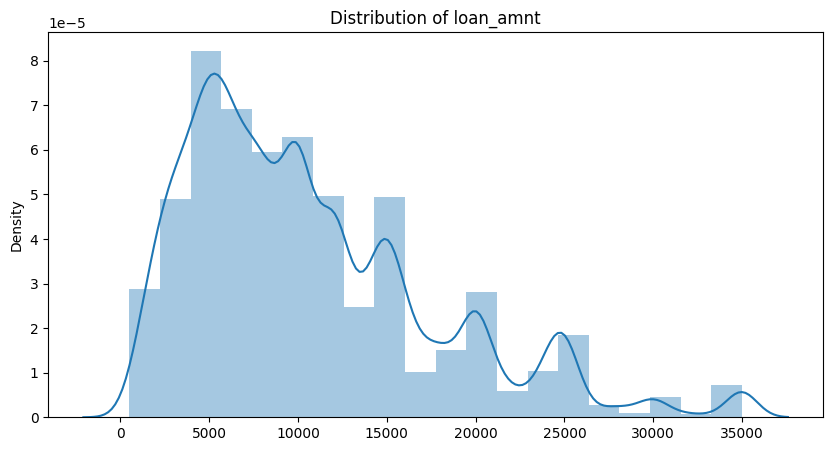

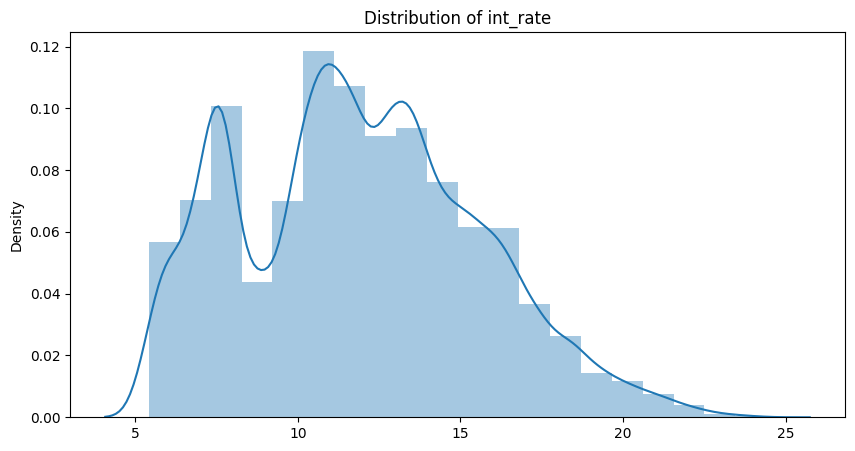

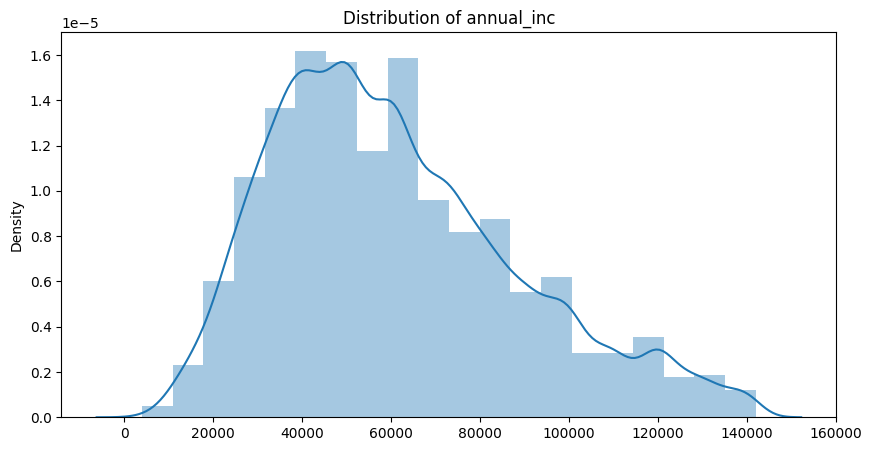

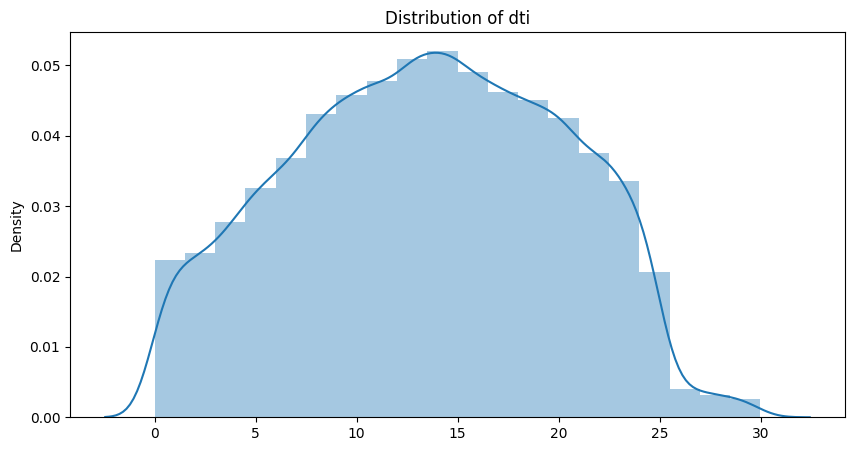

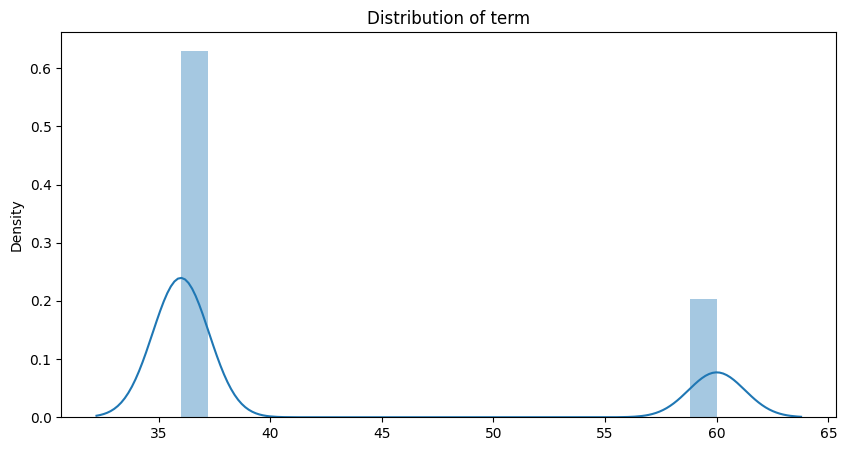

In [31]:
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'term']

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.distplot(sorted(loan[col]),kde=True,bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

### <font color=blue>Inference:</font>
<ul>
    <li>Loan Amount: Most loans are small to moderate amounts with a few large loans.</li>
    <li>Interest Rate: Interest rates vary, but there might be common rates around certain values.</li>
    <li>Annual Income: Most borrowers have moderate incomes; a few have very high incomes.</li>
    <li>Debt-to-Income Ratio: Most borrowers have a manageable DTI ratio, but some might have higher values indicating more debt.</li>
    <li>Term: A significant proportion of loans are of term 36months</li>
</ul>

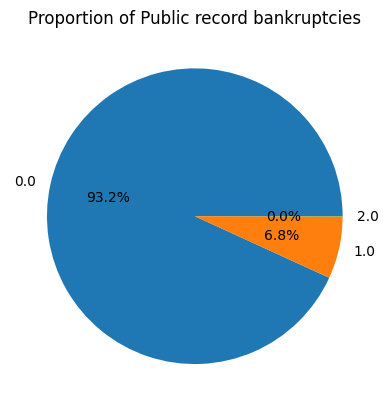

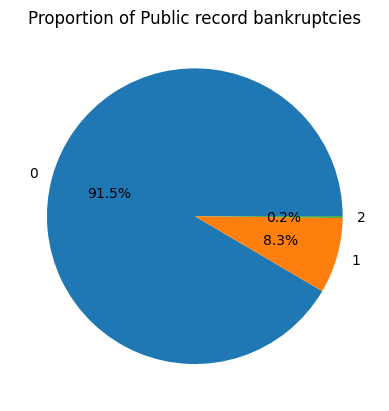

In [34]:
# Proportion of charged of loans with Public bankruptcy records or derogatory public records
loan_charged_off = loan[loan['loan_status'] == 'Charged Off']
loan_charged_off['pub_rec_bankruptcies'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Public record bankruptcies')
plt.ylabel('')
plt.show()

loan_charged_off['pub_rec'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Derogatory public records')
plt.ylabel('')
plt.show()


### <font color=blue>Inference:</font>

<ul>
    <li>Public record bankruptcies: A very small percentage of loan defaulters have filed bankruptcies.</li>
    <li>Derogatory public records: A very small percentage of loan defaulters have derogatory public records.</li>
</ul>

**Although these can be high risk customers to lend** 

### Bivariate Analysis

In [21]:
# #creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])


Text(0.5, 0, 'Grade assigned')

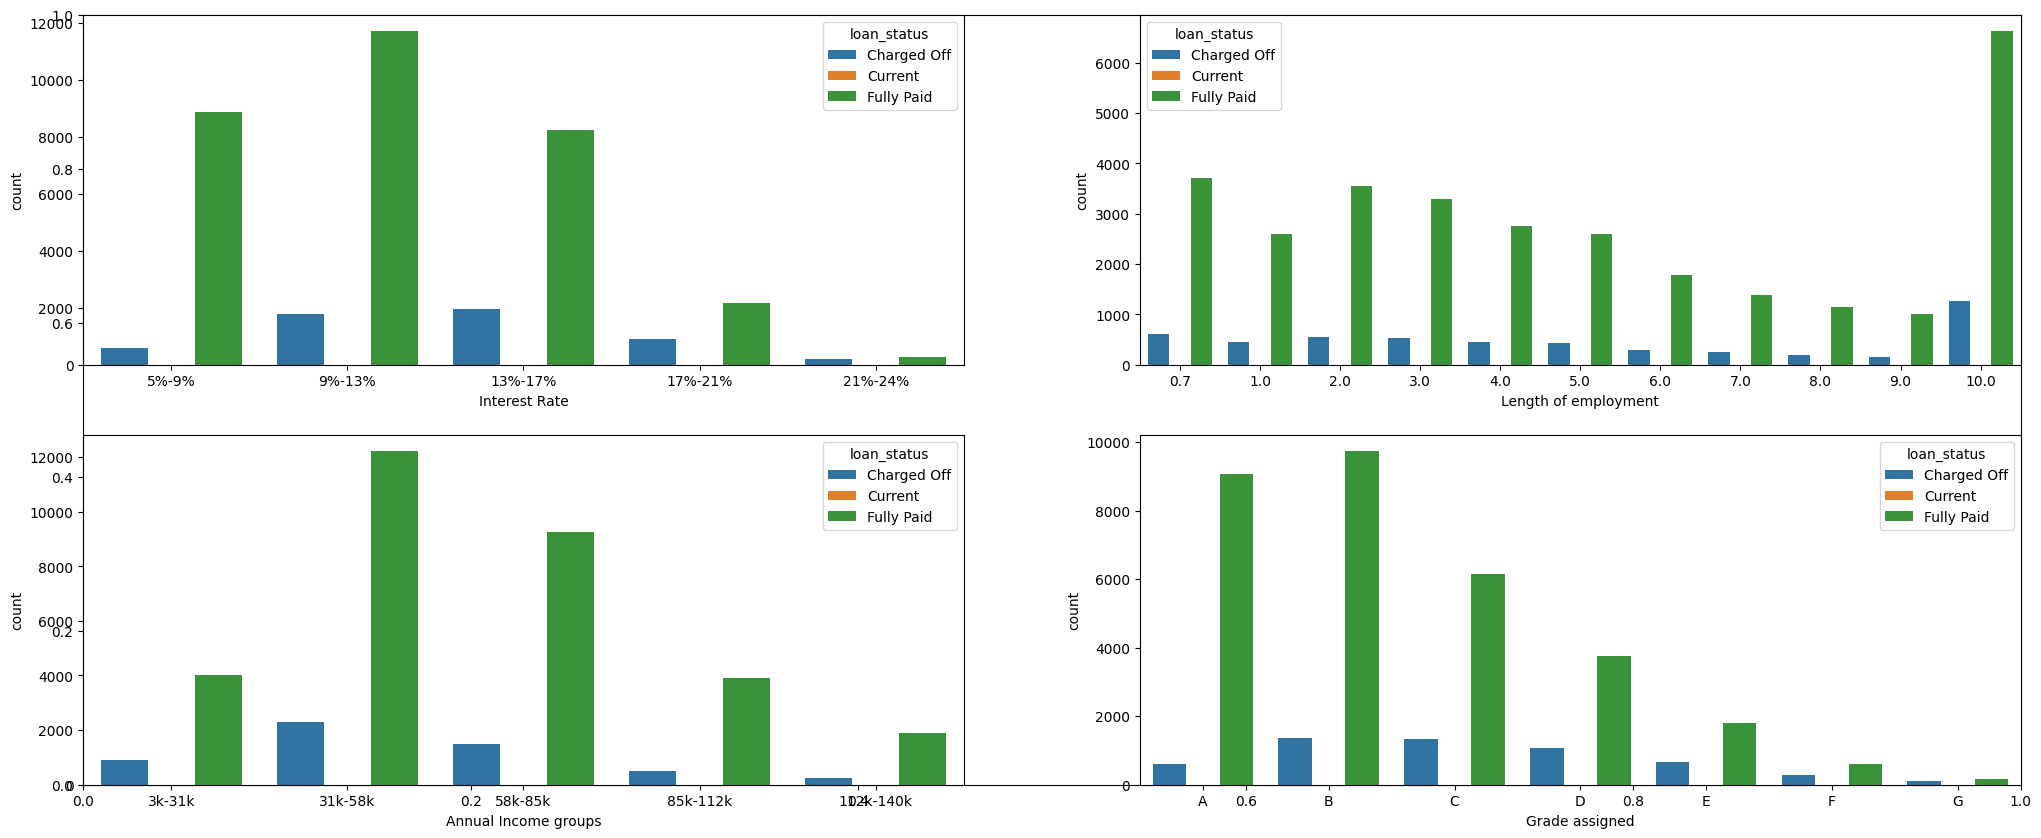

In [22]:
## Show the histogram plot for all numerical columns
from random import randint

numerical_cols = ['int_rate_groups', 'open_acc_groups', 'total_acc_groups', 'annual_inc_groups']

fig, ax = plt.subplots(figsize = (25,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', hue='loan_status', data=loan)
plt.xlabel('Interest Rate')

plt.subplot(222)
sns.countplot(x='emp_length', hue='loan_status', data=loan)
plt.xlabel('Length of employment')

plt.subplot(223)
sns.countplot(x='annual_inc_groups', hue='loan_status', data=loan)
plt.xlabel('Annual Income groups')

plt.subplot(224)
sns.countplot(x = 'grade', data = loan, hue='loan_status', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('Grade assigned')


##### Categorical Columns

In [ ]:
# Convert subgrade to numeric data for plotting countplot
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head(5)

In [ ]:
# Countplot of subgrades for Charged off and Fully Paid loan status

# fig, ax = plt.subplots(figsize=(12,7))
fig1, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Fully Paid'])
fig1.show()

fig2, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])
fig2.show()

In [ ]:
# Counts for fully paid and charged off loans



In [ ]:
print(loan.columns)
categorical_cols = ['home_ownership', 'verification_status', 'purpose']
categorical_cols_desc = {
    'home_ownership': 'Type of Home Ownership',
    'verification_status': 'Loan Verification Status',
    'loan_status': 'Status of Loan',
    'purpose': 'Purpose of Loan'
}
for col in categorical_cols:
    fig = px.bar(loan[col].value_counts().reset_index(), x=col, y=loan[col].value_counts(), title=f'Count of {categorical_cols_desc[col]}')
    fig.show()

In [ ]:
for col in categorical_cols:
    fig = px.bar(loan[col].value_counts().reset_index(), x='count', y=col, title=f'Count of {col}')
    fig.show()

In [ ]:
sns.pairplot(loan[numerical_cols])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(loan[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='grade', y='loan_amnt', data=loan)
plt.title('Loan Amount by Grade')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='loan_status', y='int_rate', data=loan)
plt.title('Interest Rate by Loan Status')
plt.show()